## Block 2 - Simple Linear Regression

In [1]:
# install and load necessary libraries
install.packages("s20x")
library(s20x)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)


In [2]:
# import relevant data for lecture
stats20x.df = read.table('data/STATS20x.txt', header = TRUE)
n = nrow(stats20x.df)
stats20xnew.df = stats20x.df[c(1:n,n),]
stats20xnew.df[n+1,c("Test","Exam")]=c(25,5)

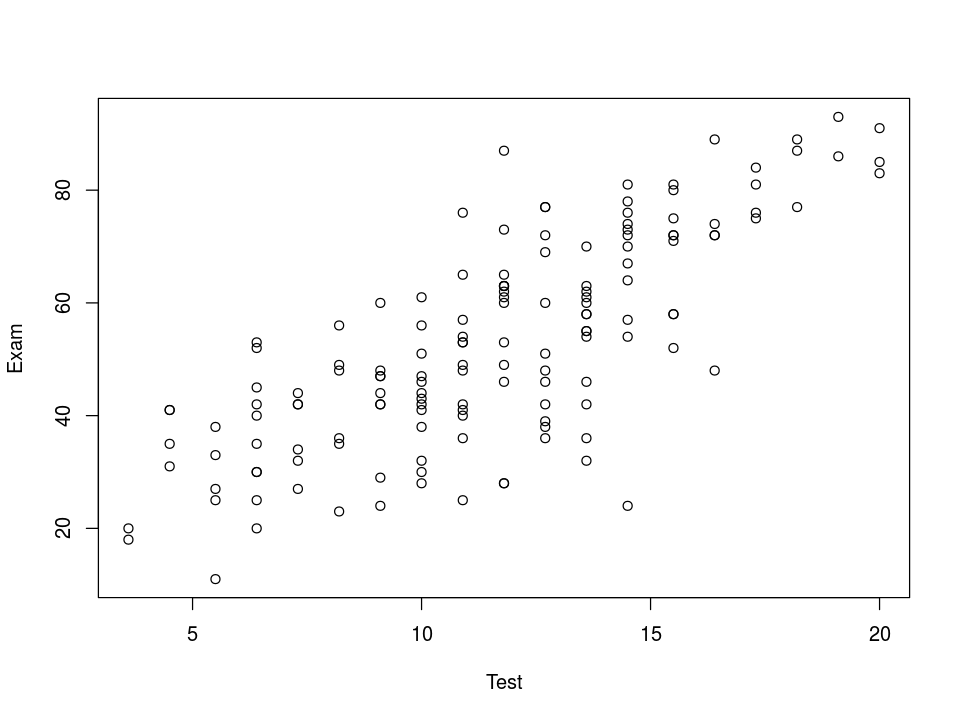

In [3]:
# slide 4
plot(Exam ~ Test, data = stats20x.df)

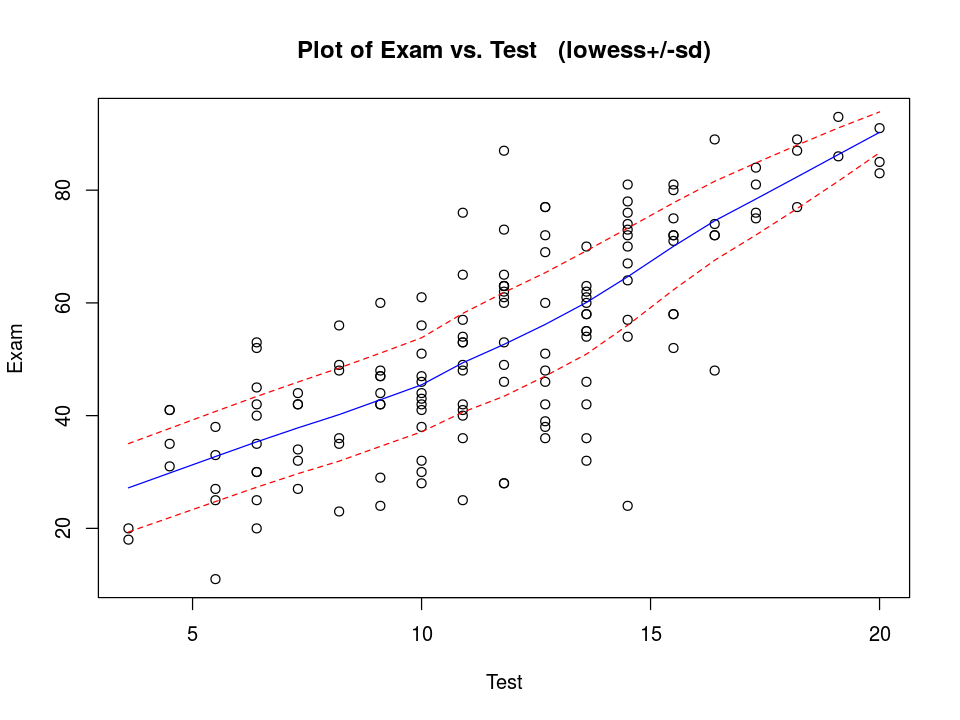

In [4]:
# slide 6
trendscatter(Exam ~ Test, data = stats20x.df)

In [5]:
# slide 8
examtest.fit = lm(Exam ~ Test, data = stats20x.df)
summary(examtest.fit)


Call:
lm(formula = Exam ~ Test, data = stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.980  -6.471   0.826   8.575  33.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.0845     3.2204   2.821  0.00547 ** 
Test          3.7859     0.2647  14.301  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 144 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.5839 
F-statistic: 204.5 on 1 and 144 DF,  p-value: < 2.2e-16


In [10]:
# slide 11
confint(examtest.fit)
summary(examtest.fit)$coef

,2.5 %,97.5 %
(Intercept),2.719020,15.449907
Test,3.262659,4.309189


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.084463,3.2204410,2.820876,5.465681e-03
Test,3.785924,0.2647333,14.300897,1.985079e-29


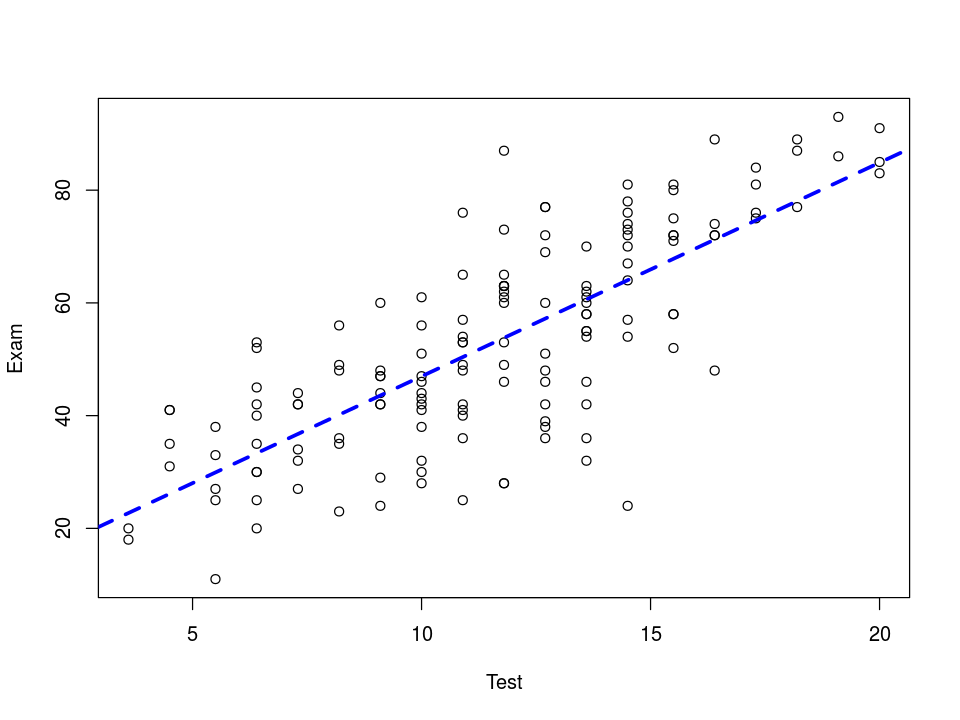

In [6]:
# slide 13
plot(Exam ~ Test, data = stats20x.df)
# add the lm estimated line to this plot where a=intercept, b=slope
abline(a = 9.08, b = 3.79, lty = 2, lwd = 3, col = "blue")

In [7]:
# slides 15-16
stats20x.df[21, ]
examtest.fit$fitted[21]
examtest.fit$residual[21]

,Grade,Pass,Exam,Degree,Gender,Attend,Assign,Test,B,C,MC,Colour,Stage1,Years.Since,Repeat
21,A,Yes,77,BSc,Female,No,16.4,12.7,15,18,22,Green,A,0.5,No


21 
57.1657

21 
19.8343

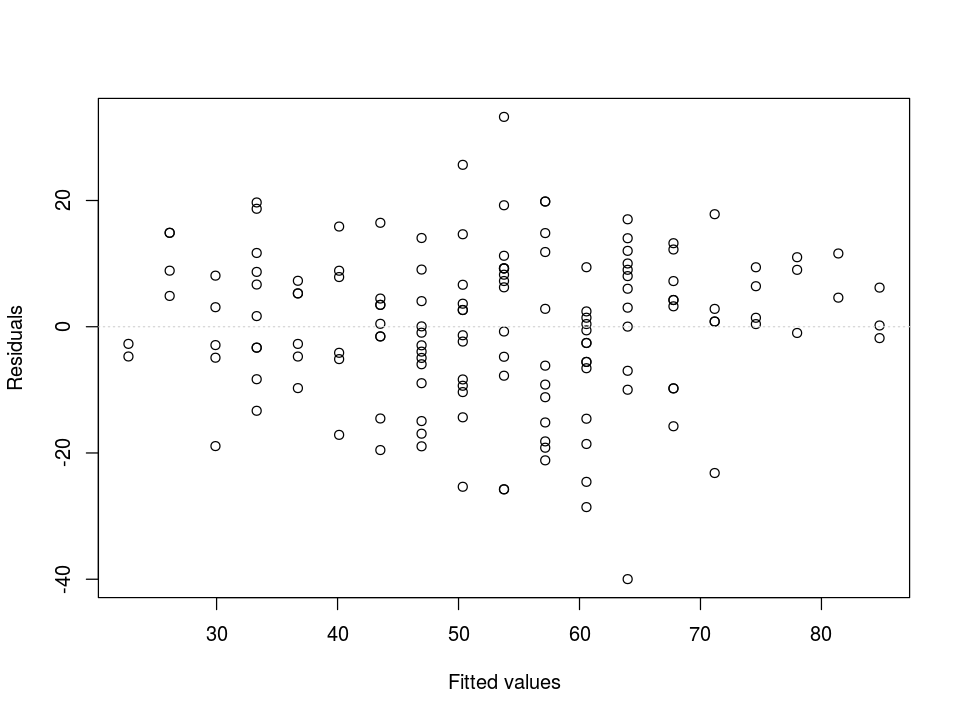

In [8]:
# slide 21
eovcheck(examtest.fit)

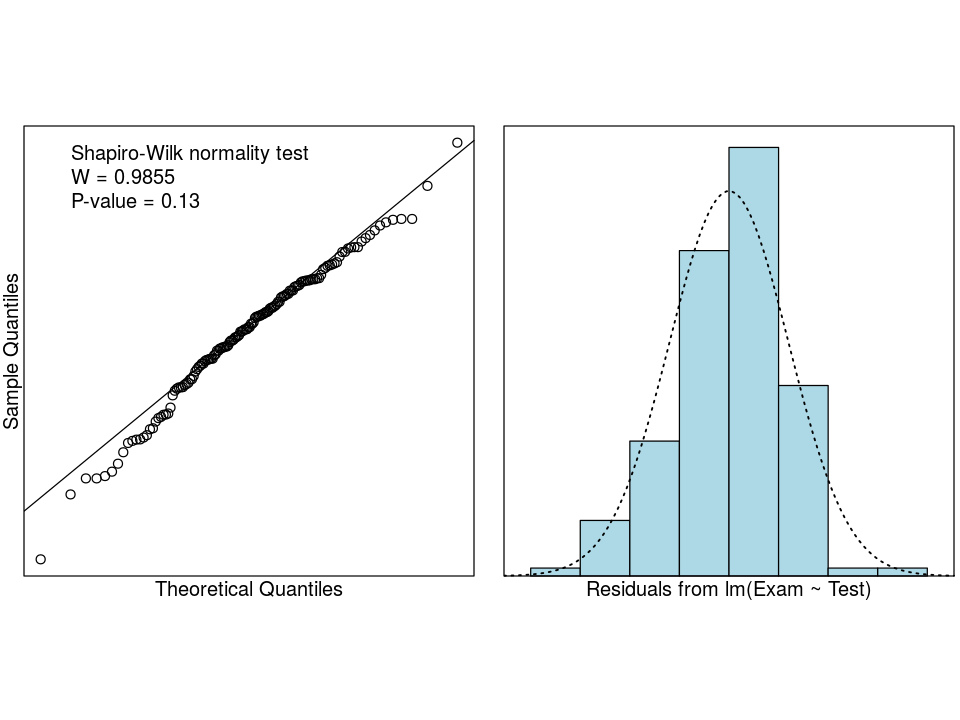

In [9]:
# slide 22
normcheck(examtest.fit, shapiro.wilk = TRUE)

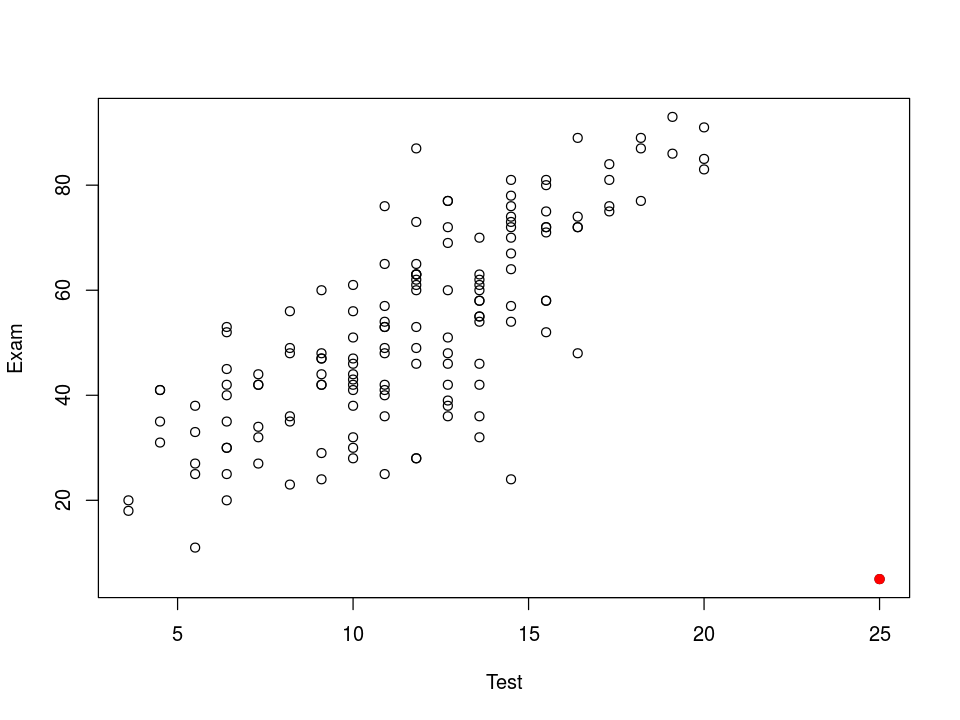

In [11]:
# slide 26
plot(Exam ~ Test, data = stats20xnew.df)
points(25, 5, pch = 19, col = "red")

In [12]:
# slide 27
examtest.fit2 = lm(Exam ~ Test, data = stats20xnew.df)
summary(examtest.fit2)


Call:
lm(formula = Exam ~ Test, data = stats20xnew.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.251  -6.846   2.638   9.456  33.996 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.2374     3.7172   4.099 6.88e-05 ***
Test          3.2006     0.3023  10.588  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.34 on 145 degrees of freedom
Multiple R-squared:  0.436,	Adjusted R-squared:  0.4322 
F-statistic: 112.1 on 1 and 145 DF,  p-value: < 2.2e-16


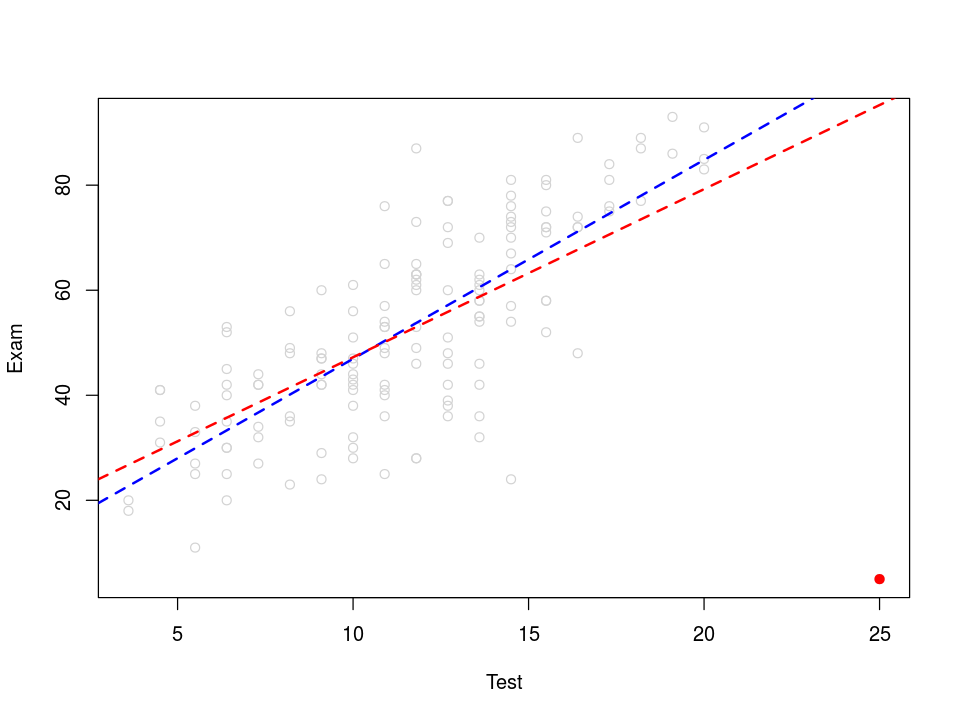

In [13]:
# slide 28
plot(Exam ~ Test, col = "light grey", data = stats20xnew.df)
points(25, 5, pch = 19, col = "red")
abline(examtest.fit$coef, lty = 2, lwd = 2, col = "blue")
abline(examtest.fit2$coef, lty = 2, lwd = 2, col = "red")

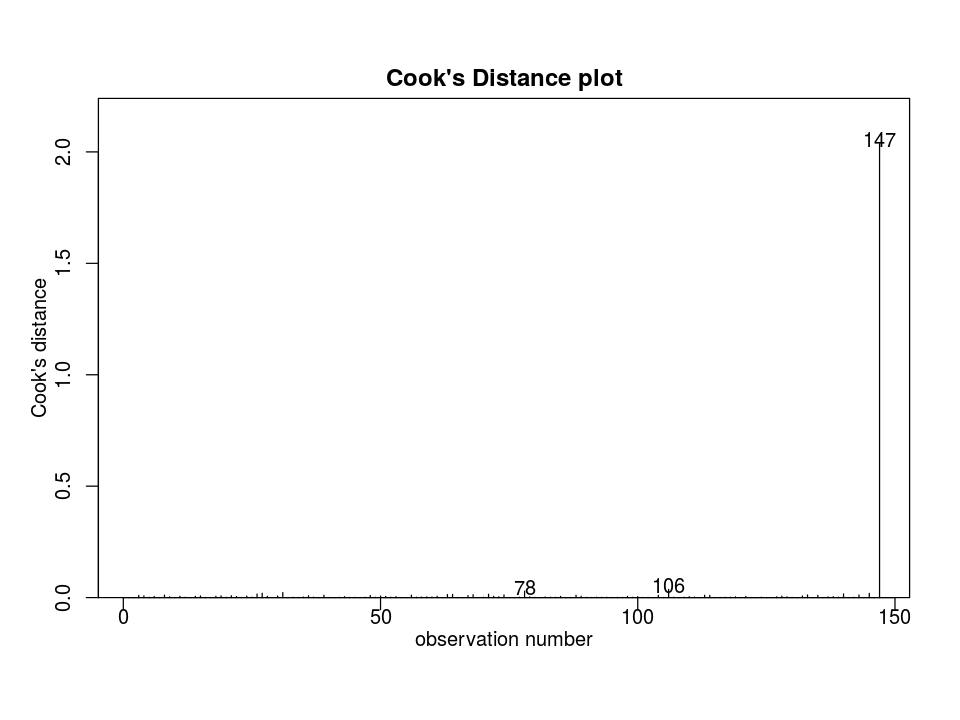

In [14]:
# slide 30
cooks20x(examtest.fit2)

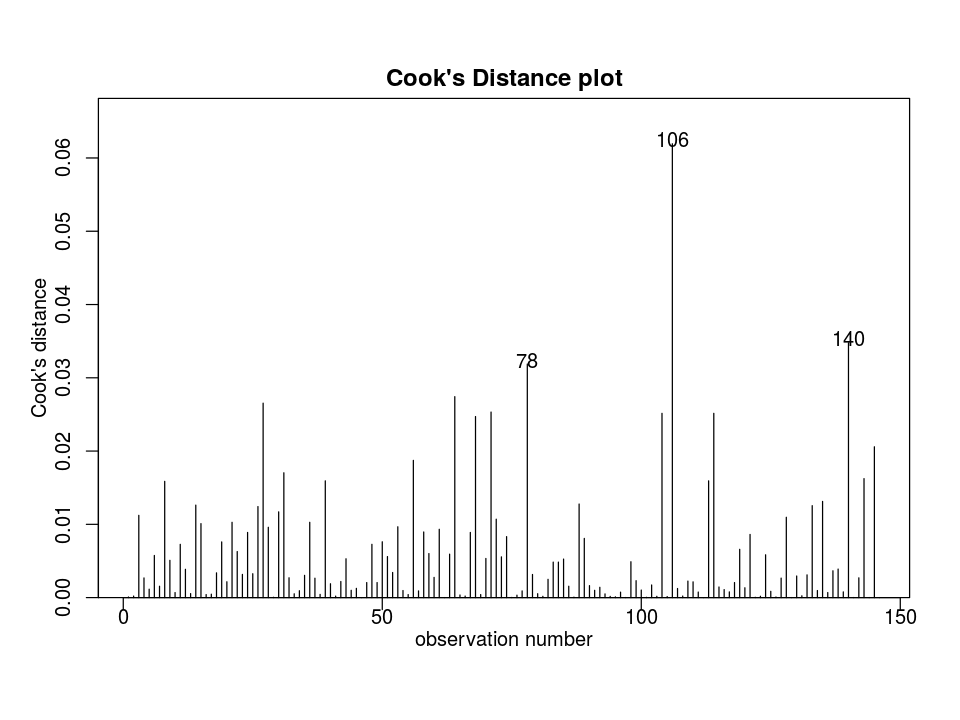

In [15]:
# slide 32
cooks20x(examtest.fit)

In [16]:
# slide 33 (intended for 2018)
#modcheck(examtest.fit)

In [17]:
# slide 34
exam.fit = lm(Exam ~ 1, data = stats20x.df)
exam.fit


Call:
lm(formula = Exam ~ 1, data = stats20x.df)

Coefficients:
(Intercept)  
      52.88  


In [18]:
# slide 35
summary(exam.fit)


Call:
lm(formula = Exam ~ 1, data = stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.877 -12.877  -1.377  15.623  40.123 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   52.877      1.546   34.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.68 on 145 degrees of freedom


In [19]:
# slide 36
confint(exam.fit)
t.test(stats20x.df$Exam)

,2.5 %,97.5 %
(Intercept),49.8215,55.93193



	One Sample t-test

data:  stats20x.df$Exam
t = 34.207, df = 145, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 49.82150 55.93193
sample estimates:
mean of x 
 52.87671 


In [20]:
# slide 42 and 45
# not sure how to recreate the output from these slides

In [21]:
# slide 46
confint(examtest.fit)
confint(examtest.fit, level = 0.99)

,2.5 %,97.5 %
(Intercept),2.719020,15.449907
Test,3.262659,4.309189


,0.5 %,99.5 %
(Intercept),0.6778171,17.491110
Test,3.0948635,4.476984


In [22]:
# slide 47
preds.df = data.frame(Test = c(0, 10, 20))
predict(examtest.fit, preds.df)

1         2         3 
 9.084463 46.943703 84.802942

In [23]:
# slide 49
predict(examtest.fit, preds.df, interval = "confidence")
predict(examtest.fit, preds.df, interval = "prediction")

,fit,lwr,upr
1,9.084463,2.71902,15.44991
2,46.943703,44.80912,49.07828
3,84.802942,79.97021,89.63568


,fit,lwr,upr
1,9.084463,-15.56475,33.73368
2,46.943703,23.03510,70.85231
3,84.802942,60.50438,109.10151


In [24]:
# slide 51
# need command to recreate this slide